<a href="https://colab.research.google.com/github/lezya/Deep-Learning/blob/master/Visualization_Of_Liner_Regression_Using_Tensor_Board.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term


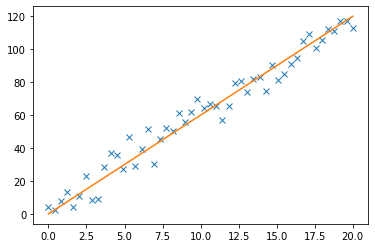

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 0.000000 Cost 3.238753 Weight 4.657053 Bias 1.510394
Epoch 40.000000 Cost 0.320568 Weight 5.826798 Bias 1.773902
Epoch 80.000000 Cost 0.315539 Weight 5.817216 Bias 1.920941
Epoch 120.000000 Cost 0.311029 Weight 5.808563 Bias 2.053724
Epoch 160.000000 Cost 0.306985 Weight 5.800748 Bias 2.173638
Epoch 200.000000 Cost 0.303355 Weight 5.793692 Bias 2.281924
Epoch 240.000000 Cost 0.300097 Weight 5.787319 Bias 2.379711
Epoch 280.000000 Cost 0.297169 Weight 5.781564 Bias 2.468023


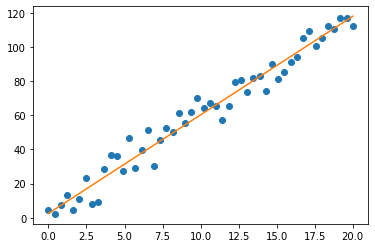

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

learning_parameter = 0.01
epochs=300
samples=50
x_train=np.linspace(0,20,samples)
y_train=6*x_train+7*np.random.randn(samples)
plt.plot(x_train,y_train,'x')
plt.plot(x_train,6*x_train)
plt.show()
Y=tf.placeholder(tf.float32)
X=tf.placeholder(tf.float32)
W=tf.Variable(np.random.randn(), name='Weights')
B=tf.Variable(np.random.randn(), name='Bias')
#Create the Model for regression
with tf.name_scope("Model") as scope:
  pred=X*W+B

#Add a summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
Bias_histogram = tf.summary.histogram("Bias", B)

#Cost Function
with tf.name_scope("cost_function") as scope:
  cost_iteration=tf.reduce_sum((pred-Y)**2/(2*samples))

#Record Cost Function Summary
cost_summary=tf.summary.scalar("Cost", cost_iteration)

#Define Optimizer
with tf.name_scope("Training") as scope:
  optimizer=tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

#Initialize Variables
init=tf.global_variables_initializer() 

#merge all the summaries
merged_summary=tf.summary.merge_all()

#Define Tensorflow session
with tf.Session() as sess:
  sess.run(init)
  #Store all the files in Log folder
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range (epochs):
    for x,y in zip(x_train,y_train):
      sess.run(optimizer, feed_dict={X:x,Y:y})
      #write logs to each epochs
      summary_epochs=sess.run(merged_summary, feed_dict={X:x,Y:y})
      writer.add_summary(summary_epochs,epoch)
    if not epoch % 40:
      W1=sess.run(W)
      B1=sess.run(B)
      cost_iter=sess.run(cost_iteration, feed_dict={X:x,Y:y})
      print('Epoch %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1,B1))
  Weight=sess.run(W)
  Bias=sess.run(B)
plt.plot(x_train,y_train,'o')
plt.plot(x_train, Weight*x_train+Bias)
plt.show()

In [2]:
#Command to interactively use Tensorboard
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-03-25 17:23:55--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.5.68.140, 52.7.241.210, 34.231.69.169, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.5.68.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  63.4MB/s    in 0.2s    

2020-03-25 17:23:55 (63.4 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [3]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [6]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://2265dc1b.ngrok.io
